# S05_T01_Sampling

### Ex1: Agafa un conjunt de dades de tema esportiu que t'agradi. Realitza un mostreig de les dades generant una mostra aleatòria simple i una mostra sistemàtica

In [4]:
#Importem llibreries necessàries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from random import randint

In [5]:
#he agafat un dataset de la web Zenodo, amb alguns professionals del pàdel, que conté dades com el nom, alçada, ranking.
#punts, partits guanyats... de l'any 2020 i 2021.

data_df= pd.read_csv("statistics_players.csv", sep= ";")
data_df.head()

,name,ranking,puntos,partidos_jugados,partidos_ganados,partidos_perdidos,efectividad,racha_victorias,compañero,posicion,...,dieciseisavos 2021,partidos jugados 2020,partidos ganados 2020,efectividad 2020,campeon 2020,finalista 2020,semifinalista 2020,cuartos 2020,octavos 2020,dieciseisavos 2020
0,Juan Lebrón Chincoa,1,15450,312,199,113,"63,78",18,Alejandro Galán Romo,Revés,...,0,42.0,37.0,"88,1",6.0,2.0,3.0,0.0,0.0,0.0
1,Alejandro Galán Romo,2,14830,297,206,91,"69,36",18,Juan Lebrón Chincoa,Revés,...,0,42.0,37.0,"88,1",6.0,2.0,3.0,0.0,0.0,0.0
2,Francisco Navarro Compán,3,10970,416,312,104,75,15,Martín Di Nenno,Revés,...,0,31.0,22.0,"70,97",1.0,2.0,4.0,3.0,0.0,0.0
3,Fernando Belasteguín,4,10815,423,377,46,"89,13",63,Carlos Daniel Gutiérrez,Revés,...,0,34.0,26.0,"76,47",2.0,2.0,2.0,4.0,0.0,0.0
4,Carlos Daniel Gutiérrez,5,10770,439,342,97,"77,9",13,Fernando Belasteguín,Drive,...,0,32.0,22.0,"68,75",1.0,2.0,5.0,1.0,2.0,0.0


In [6]:
data_df.tail()

,name,ranking,puntos,partidos_jugados,partidos_ganados,partidos_perdidos,efectividad,racha_victorias,compañero,posicion,...,dieciseisavos 2021,partidos jugados 2020,partidos ganados 2020,efectividad 2020,campeon 2020,finalista 2020,semifinalista 2020,cuartos 2020,octavos 2020,dieciseisavos 2020
44,Paula Josemaría Martín,7,9235,143,81,62,"56,64",7,Ariana Sánchez Fallada,Drive,...,0,33.0,24.0,"72,73",1.0,3.0,2.0,4.0,0.0,0.0
45,Beatriz González Fernández,10,6465,134,78,56,"58,21",6,Lucía Sainz Pelegri,Revés,...,0,48.0,33.0,"68,75",2.0,0.0,1.0,11.0,2.0,1.0
46,Patricia Llaguno Zielinski,11,6170,285,200,85,"70,18",7,María Virginia Riera,Revés,...,0,35.0,24.0,"68,57",0.0,1.0,3.0,6.0,1.0,0.0
47,Delfina Brea Senesi,14,3390,118,71,47,"60,17",6,Tamara Icardo Alcorisa,Drive,...,0,34.0,19.0,"55,88",1.0,0.0,0.0,3.0,8.0,4.0
48,Tamara Icardo Alcorisa,23,1828,137,58,79,"42,34",3,Delfina Brea Senesi,Revés,...,0,13.0,4.0,"30,77",0.0,0.0,0.0,0.0,4.0,5.0


In [7]:
data_df.describe()

,ranking,puntos,partidos_jugados,partidos_ganados,partidos_perdidos,racha_victorias,partidos jugados 2021,partidos ganados 2021,campeon 2021,finalista 2021,...,octavos 2021,dieciseisavos 2021,partidos jugados 2020,partidos ganados 2020,campeon 2020,finalista 2020,semifinalista 2020,cuartos 2020,octavos 2020,dieciseisavos 2020
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,97.530612,3455.530612,154.102041,96.775510,57.326531,7.612245,9.408163,5.244898,0.122449,0.061224,...,0.163265,0.204082,19.851064,11.659574,0.787234,0.531915,0.808511,1.042553,0.787234,1.361702
std,91.798489,4825.290069,124.994541,96.900779,37.406766,9.517126,16.755495,11.287033,0.389051,0.242226,...,0.472005,0.706505,13.834391,11.955127,1.640999,0.952139,1.393124,2.074246,1.531356,2.470922
min,1.000000,25.000000,7.000000,1.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,69.000000,41.000000,14.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,8.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,1174.000000,118.000000,69.000000,54.000000,5.000000,3.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,180.000000,6170.000000,260.000000,165.000000,80.000000,8.000000,8.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,32.500000,22.000000,1.000000,0.500000,1.500000,1.500000,1.000000,1.000000
max,255.000000,15450.000000,439.000000,377.000000,138.000000,63.000000,72.000000,52.000000,2.000000,1.000000,...,2.000000,4.000000,48.000000,37.000000,6.000000,3.000000,5.000000,11.000000,8.000000,8.000000


In [8]:
data_df.shape

(49, 32)

In [9]:
data_df.columns

Index(['name', 'ranking', 'puntos', 'partidos_jugados', 'partidos_ganados',
       'partidos_perdidos', 'efectividad', 'racha_victorias', 'compañero',
       'posicion', 'lugar nacimiento', 'fecha nacimiento', 'altura',
       'residencia', 'partidos jugados 2021', 'partidos ganados 2021',
       'efectividad 2021', 'campeon 2021', 'finalista 2021',
       'semifinalista 2021', 'cuartos 2021', 'octavos 2021',
       'dieciseisavos 2021', 'partidos jugados 2020', 'partidos ganados 2020',
       'efectividad 2020', 'campeon 2020', 'finalista 2020',
       'semifinalista 2020', 'cuartos 2020', 'octavos 2020',
       'dieciseisavos 2020'],
      dtype='object')

In [10]:
#eliminem columnes que no necessitarem
data_df = data_df.drop(['partidos_perdidos','racha_victorias','semifinalista 2021','cuartos 2021', 'octavos 2021',
       'dieciseisavos 2021','semifinalista 2020', 'cuartos 2020', 'octavos 2020',
       'dieciseisavos 2020'], axis = 1)

In [11]:
data_df.describe()

,ranking,puntos,partidos_jugados,partidos_ganados,partidos jugados 2021,partidos ganados 2021,campeon 2021,finalista 2021,partidos jugados 2020,partidos ganados 2020,campeon 2020,finalista 2020
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,47.000000,47.000000,47.000000,47.000000
mean,97.530612,3455.530612,154.102041,96.775510,9.408163,5.244898,0.122449,0.061224,19.851064,11.659574,0.787234,0.531915
std,91.798489,4825.290069,124.994541,96.900779,16.755495,11.287033,0.389051,0.242226,13.834391,11.955127,1.640999,0.952139
min,1.000000,25.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,69.000000,41.000000,14.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.500000,0.000000,0.000000
50%,53.000000,1174.000000,118.000000,69.000000,3.000000,1.000000,0.000000,0.000000,19.000000,5.000000,0.000000,0.000000
75%,180.000000,6170.000000,260.000000,165.000000,8.000000,4.000000,0.000000,0.000000,32.500000,22.000000,1.000000,0.500000
max,255.000000,15450.000000,439.000000,377.000000,72.000000,52.000000,2.000000,1.000000,48.000000,37.000000,6.000000,3.000000


In [12]:
data_df.shape

(49, 22)

In [13]:
#generem mostra aleàtoria simple 
simple_sample_df=data_df.sample(20)

In [14]:
simple_sample_df.head(10)

,name,ranking,puntos,partidos_jugados,partidos_ganados,efectividad,compañero,posicion,lugar nacimiento,fecha nacimiento,...,partidos jugados 2021,partidos ganados 2021,efectividad 2021,campeon 2021,finalista 2021,partidos jugados 2020,partidos ganados 2020,efectividad 2020,campeon 2020,finalista 2020
23,Carlos Mora Íscar,169,78,41,12,"29,27",Marc Pou Serra,Revés,Palma de Mallorca,05/08/2000,...,1,0,0,0,0,13.0,4.0,"30,77",0.0,0.0
40,Lucía Sainz Pelegri,2,11905,266,188,"70,68",Beatriz González Fernández,Drive,Barcelona,05/10/1984,...,4,3,75,0,1,41.0,35.0,"85,37",5.0,2.0
17,Javier Valdés González,64,986,221,141,"63,8",Simon Vasquez,Drive,Santiago de Chile,27/06/1996,...,1,0,0,0,0,19.0,7.0,"36,84",0.0,0.0
9,Gonzalo Rubio Pérez,36,1574,260,122,"46,92",Christian Fuster Simarro,Drive,Sevilla,22/02/1991,...,0,0,0,0,0,13.0,3.0,"23,08",0.0,0.0
20,Alfonso Sánchez Arriaga,157,89,94,33,"35,11",Adrián Corona Roldán,Revés,Valladolid,10/08/1998,...,2,1,50,0,0,13.0,5.0,"38,46",0.0,0.0
42,Gemma Triay Pons,4,11665,250,176,"70,4",Alejandra Salazar Bengoechea,Revés,Mahón,28/06/1992,...,0,0,0,0,0,41.0,35.0,"85,37",5.0,2.0
32,Igor Amondarain González,234,34,10,3,30,David García Campos,Drive,San Sebastian,01/04/2002,...,5,2,40,0,0,5.0,1.0,20,0.0,0.0
19,Simon Vasquez,150,94,14,3,"21,43",Javier Valdés González,Drive,Angelholm - Suecia,21/12/1992,...,11,3,"27,27",0,0,3.0,0.0,0,0.0,0.0
0,Juan Lebrón Chincoa,1,15450,312,199,"63,78",Alejandro Galán Romo,Revés,Puerto de Sta. María,30/01/1995,...,0,0,0,0,0,42.0,37.0,"88,1",6.0,2.0
48,Tamara Icardo Alcorisa,23,1828,137,58,"42,34",Delfina Brea Senesi,Revés,Valencia,10/10/1995,...,4,3,75,0,0,13.0,4.0,"30,77",0.0,0.0


In [15]:
simple_sample_df.describe()

,ranking,puntos,partidos_jugados,partidos_ganados,partidos jugados 2021,partidos ganados 2021,campeon 2021,finalista 2021,partidos jugados 2020,partidos ganados 2020,campeon 2020,finalista 2020
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,95.750000,4149.250000,145.150000,89.800000,7.200000,4.000000,0.050000,0.050000,19.800000,12.350000,1.150000,0.65000
std,93.537988,5566.400348,111.715934,82.952491,16.204613,11.443224,0.223607,0.223607,14.174105,13.271556,2.033276,1.03999
min,1.000000,25.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.00000
25%,4.750000,75.750000,40.000000,12.000000,0.750000,0.000000,0.000000,0.000000,6.750000,2.750000,0.000000,0.00000
50%,50.000000,1280.000000,127.500000,63.500000,2.500000,1.000000,0.000000,0.000000,14.000000,5.500000,0.000000,0.00000
75%,171.750000,10678.750000,252.500000,167.750000,4.250000,3.000000,0.000000,0.000000,33.750000,25.000000,1.500000,2.00000
max,255.000000,15450.000000,312.000000,224.000000,72.000000,52.000000,1.000000,1.000000,42.000000,37.000000,6.000000,3.00000


In [16]:
#generem mostra aleàtoria sistemàtica
#calculem step(k) = (poblacio)49/(mostra)24=> k=2
#el valor d'inici es tria com un aleatori entre els primers k elemnets de la llista(h)
k=2
h=np.random.randint(1,k)
l=len(data_df)
sistem_aleat_sample_df= data_df[h:l:k]
sistem_aleat_sample_df
#en el dataset que he triat, hi ha poc nombre de files (mostres), per tant, la mostra aleàtoria sistemàtica 
#no tindria molt sentit realitzar-la, però a mode d'exercici serveix!

,name,ranking,puntos,partidos_jugados,partidos_ganados,efectividad,compañero,posicion,lugar nacimiento,fecha nacimiento,...,partidos jugados 2021,partidos ganados 2021,efectividad 2021,campeon 2021,finalista 2021,partidos jugados 2020,partidos ganados 2020,efectividad 2020,campeon 2020,finalista 2020
1,Alejandro Galán Romo,2,14830,297,206,"69,36",Juan Lebrón Chincoa,Revés,Madrid,15/05/1996,...,0,0,0,0,0,42.0,37.0,"88,1",6.0,2.0
3,Fernando Belasteguín,4,10815,423,377,"89,13",Carlos Daniel Gutiérrez,Revés,Pehuajo,19/05/1979,...,4,4,100,1,0,34.0,26.0,"76,47",2.0,2.0
5,Jorge Nieto Ruiz,21,2900,205,120,"58,54",Juan Martín Díaz Martínez,Revés,Madrid,18/12/1998,...,2,1,50,0,0,22.0,11.0,50,0.0,0.0
7,Arturo Coello Manso,31,1783,72,39,"54,17",Miguel Lamperti,Drive,Valladolid,08/03/2002,...,39,20,"51,28",0,0,30.0,18.0,60,0.0,0.0
9,Gonzalo Rubio Pérez,36,1574,260,122,"46,92",Christian Fuster Simarro,Drive,Sevilla,22/02/1991,...,0,0,0,0,0,13.0,3.0,"23,08",0.0,0.0
11,Javier Garrido Gómez,38,1532,171,93,"54,39",Juan Cruz Belluati López,Revés,Córdoba,26/10/2000,...,0,0,0,0,0,11.0,2.0,"18,18",0.0,0.0
13,Maximiliano Grabiel Martínez,49,1203,293,170,"58,02",Adrián Blanco Antelo,Drive,La Plata,12/08/1976,...,2,1,50,0,0,13.0,3.0,"23,08",0.0,0.0
15,Miguel Yanguas Diez,54,1166,99,62,"62,63",Iván Ramírez Del Campo,Drive,Málaga,18/03/2002,...,69,50,"72,46",0,0,26.0,11.0,"42,31",0.0,0.0
17,Javier Valdés González,64,986,221,141,"63,8",Simon Vasquez,Drive,Santiago de Chile,27/06/1996,...,1,0,0,0,0,19.0,7.0,"36,84",0.0,0.0
19,Simon Vasquez,150,94,14,3,"21,43",Javier Valdés González,Drive,Angelholm - Suecia,21/12/1992,...,11,3,"27,27",0,0,3.0,0.0,0,0.0,0.0


### Ex2: Continua amb el conjunt de dades de tema esportiu i genera una mostra estratificada i una mostra utilitzant SMOTE (Synthetic Minority Oversampling Technique)

Stratified Sampling

Assume that we need to estimate the average number of votes for each candidate in an election. Assume that the country has 3 towns:
Town A has 1 million factory workers,
Town B has 2 million workers, and
Town C has 3 million retirees.
We can choose to get a random sample of size 60 over the entire population but there is some chance that the random sample turns out to be not well balanced across these towns and hence is biased causing a significant error in estimation.
Instead, if we choose to take a random sample of 10, 20 and 30 from Town A, B and C respectively then we can produce a smaller error in estimation for the same total size of the sample.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25)


In [62]:
#he agafat un dataset de la web Zenodo, amb alguns professionals del pàdel, que conté dades com el nom, alçada, ranking,
#punts, partits guanyats... de l'any 2020 i 2021.

pd.set_option("display.max_rows",None)
new_data_df= pd.read_csv("athlete_events.csv")
new_data_df.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [18]:
new_data_df.tail(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271106,135565,Fernando scar Zylberberg,M,27.0,168.0,76.0,Argentina,ARG,2004 Summer,2004,Summer,Athina,Hockey,Hockey Men's Hockey,NaN
271107,135566,"James Francis ""Jim"" Zylker",M,21.0,175.0,75.0,United States,USA,1972 Summer,1972,Summer,Munich,Football,Football Men's Football,NaN
271108,135567,Aleksandr Viktorovich Zyuzin,M,24.0,183.0,72.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271109,135567,Aleksandr Viktorovich Zyuzin,M,28.0,183.0,72.0,Russia,RUS,2004 Summer,2004,Summer,Athina,Rowing,Rowing Men's Lightweight Coxless Fours,NaN
271110,135568,Olga Igorevna Zyuzkova,F,33.0,171.0,69.0,Belarus,BLR,2016 Summer,2016,Summer,Rio de Janeiro,Basketball,Basketball Women's Basketball,NaN
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [19]:
new_data_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [20]:
#generem mostra aleàtoria simple per poder comparar amb les diferents mostres que ens demana l'exercici
simple_aleat_data=new_data_df.sample(200)
simple_aleat_data.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
230408,115648,Eivor Mona-Lisa Strandvall-Pursiainen,F,21.0,170.0,57.0,Finland,FIN,1972 Summer,1972,Summer,Munich,Athletics,Athletics Women's 400 metres,NaN
113919,57703,Viktoriya Pavlivna Karpenko,F,19.0,148.0,40.0,Ukraine,UKR,2000 Summer,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Team All-Around,NaN
246093,123232,Jerzy Ulczyski,M,24.0,191.0,88.0,Poland,POL,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Coxed Fours,NaN
243024,121706,Olga Sergeyevna Tratsevskaya,F,25.0,180.0,78.0,Belarus,BLR,2000 Summer,2000,Summer,Sydney,Rowing,Rowing Women's Coxed Eights,NaN
263879,132044,Xiong Fengshan,M,24.0,175.0,71.0,China,CHN,1988 Summer,1988,Summer,Seoul,Judo,Judo Men's Lightweight,NaN
30646,15790,"Robert John ""Rob"" Bruniges",M,19.0,188.0,82.0,Great Britain,GBR,1976 Summer,1976,Summer,Montreal,Fencing,"Fencing Men's Foil, Individual",NaN
101771,51468,Eija Marita Hyytiinen (-Ristanen),F,23.0,172.0,61.5,Finland,FIN,1984 Winter,1984,Winter,Sarajevo,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,Bronze
126844,63950,Franz Kreisel,M,38.0,NaN,NaN,Germany,GER,1928 Winter,1928,Winter,Sankt Moritz,Ice Hockey,Ice Hockey Men's Ice Hockey,NaN
89549,45378,"Jen Arhand ""Gene"" Hmori",M,31.0,183.0,77.0,United States,USA,1964 Summer,1964,Summer,Tokyo,Fencing,"Fencing Men's Sabre, Individual",NaN
110298,55786,Stella Helena Jongmans,F,21.0,174.0,59.0,Netherlands,NED,1992 Summer,1992,Summer,Barcelona,Athletics,Athletics Women's 800 metres,NaN


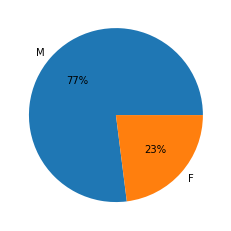

In [21]:
#Gràfiquem la distribució de observacions per sexe

simple_aleat_sex_counts = simple_aleat_data["Sex"].value_counts()
data = simple_aleat_sex_counts
labels = simple_aleat_sex_counts.index

plt.pie(data, labels= labels, autopct= "%.f%%")
plt.show()


In [22]:
#agafem aquest atribut "Sex" ja que per corregir una mica biaixos a la hora de randomitzar les dades. Podem stratificar, 
#ja que hi ha una gran diferència entre les obsevacions femenines i masculines
new_data_df["Sex"].value_counts()

M    196594
F     74522
Name: Sex, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(new_data_df, stratify=new_data_df[["Sex"]],test_size=0.25)
X_train.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
154614,77625,Aaron John McIntosh,M,24.0,177.0,71.0,New Zealand,NZL,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Men's Windsurfer,NaN
114640,58049,Edgar Katzenstein,M,20.0,NaN,NaN,"Germania Ruder Club, Hamburg",GER,1900 Summer,1900,Summer,Paris,Rowing,Rowing Men's Coxed Eights,NaN
17363,9261,Flix Bcquer Lastra,M,21.0,178.0,72.0,Mexico,MEX,1968 Summer,1968,Summer,Mexico City,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
170256,85551,Anne Jessica Newberry-Ransehousen,F,21.0,169.0,52.0,United States,USA,1960 Summer,1960,Summer,Roma,Equestrianism,"Equestrianism Mixed Dressage, Individual",NaN
77597,39381,Hermann Geiler,M,22.0,NaN,NaN,Austria,AUT,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres,NaN
68416,34932,Ferrand,M,NaN,NaN,NaN,France,FRA,1900 Summer,1900,Summer,Paris,Fencing,"Fencing Men's Foil, Individual",NaN
85300,43260,Andrzej Grubba,M,38.0,174.0,64.0,Poland,POL,1996 Summer,1996,Summer,Atlanta,Table Tennis,Table Tennis Men's Doubles,NaN
258267,129323,Birte Weigang (-Rode),F,20.0,176.0,70.0,East Germany,GDR,1988 Summer,1988,Summer,Seoul,Swimming,Swimming Women's 200 metres Butterfly,Silver
114474,57973,Ktia Cilene Teixeira da Silva,F,19.0,172.0,70.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,NaN
193357,97060,"Donald Carlton ""Don"" Pritchard",M,29.0,NaN,NaN,Yeoman,BAH,1952 Summer,1952,Summer,Helsinki,Sailing,Sailing Mixed 5.5 metres,NaN


In [24]:
X_train.tail(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
64345,32951,Bo Knut Arvid Eriksson,M,26.0,NaN,NaN,Sweden,SWE,1948 Summer,1948,Summer,London,Fencing,"Fencing Men's Foil, Individual",NaN
118811,60132,Kim Mi-Jeong,F,27.0,160.0,54.0,South Korea,KOR,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Women's epee, Individual",NaN
38549,19829,James Ormsbee Chapin,M,45.0,NaN,NaN,United States,USA,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN
133803,67376,Jian-Fang Lay (Hong-),F,43.0,163.0,58.0,Australia,AUS,2016 Summer,2016,Summer,Rio de Janeiro,Table Tennis,Table Tennis Women's Team,NaN
120833,61133,Peter Klein,M,29.0,179.0,78.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 4 x 100 metres Relay,NaN
23709,12458,Alfonso Bobadilla,M,32.0,NaN,NaN,Chile,CHI,1984 Summer,1984,Summer,Los Angeles,Equestrianism,"Equestrianism Mixed Jumping, Team",NaN
70061,35688,Ottorino Flaborea,M,28.0,197.0,105.0,Italy,ITA,1968 Summer,1968,Summer,Mexico City,Basketball,Basketball Men's Basketball,NaN
212842,106871,George Sylvester Schiller,M,19.0,175.0,66.0,United States,USA,1920 Summer,1920,Summer,Antwerpen,Athletics,Athletics Men's 4 x 400 metres Relay,NaN
225019,113048,Ren Sommerfeldt,M,31.0,175.0,68.0,Germany,GER,2006 Winter,2006,Winter,Torino,Cross Country Skiing,Cross Country Skiing Men's 50 kilometres,NaN
43104,22229,Pietie Coetzee,F,33.0,176.0,69.0,South Africa,RSA,2012 Summer,2012,Summer,London,Hockey,Hockey Women's Hockey,NaN


In [25]:
X_train["Sex"].unique()

array(['M', 'F'], dtype=object)

In [26]:
X_train["Sex"].describe()

count     203337
unique         2
top            M
freq      147446
Name: Sex, dtype: object

In [27]:
sex_counts_strat = X_train["Sex"].value_counts()
sex_counts_strat

M    147446
F     55891
Name: Sex, dtype: int64

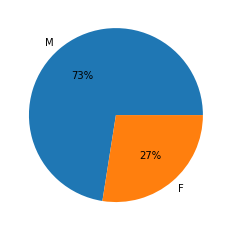

In [28]:
#Gràfiquem la distribució de observacions per sexe

sex_counts_strat = X_train["Sex"].value_counts()
data = sex_counts_strat
labels = sex_counts_strat.index

plt.pie(data, labels= labels, autopct= "%.f%%")
plt.show()


Observem que a l'stratificar la mostra, la distribució per observacions no varia gaire respecte la q tenim a la mostra aleatoria simple, però tenint la mostra random stratificada, ara es podrien agafar subgrups i tindriem la mateixa proporció de ambdues observacions

In [29]:
#mostra utilitzant SMOTE(Synthetic Minority Oversampling Technique)

Oversampling using SMOTE

In SMOTE (Synthetic Minority Oversampling Technique) we synthesize elements for the minority class, in the vicinity of already existing elements

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

In [30]:
from imblearn.over_sampling import SMOTE

In [31]:
#converteix els dos valors possibles de la variable Sex en boolean values per poder fer correctament l'SMOTE
new_data_df["Sex"] = [0 if x== "M" else 1 for x in new_data_df["Sex"]]

In [37]:
#Fem dataframe nomes amb les columnes que no són de valor "string", ja que al fer l'SMOTE dona una errada de format string
num_new_data_df = new_data_df.loc[:,["Sex","Age","Height","Weight"]]

In [39]:
num_new_data_df.head(10)

,Sex,Age,Height,Weight
0,0,24.0,180.0,80.0
1,0,23.0,170.0,60.0
2,0,24.0,NaN,NaN
3,0,34.0,NaN,NaN
4,1,21.0,185.0,82.0
5,1,21.0,185.0,82.0
6,1,25.0,185.0,82.0
7,1,25.0,185.0,82.0
8,1,27.0,185.0,82.0
9,1,27.0,185.0,82.0


In [43]:
#Comprovem si tenim NaN values i els reemplaçem per zero's
num_new_data_df.fillna(value=0, inplace = True)
num_new_data_df.head(10)

,Sex,Age,Height,Weight
0,0,24.0,180.0,80.0
1,0,23.0,170.0,60.0
2,0,24.0,0.0,0.0
3,0,34.0,0.0,0.0
4,1,21.0,185.0,82.0
5,1,21.0,185.0,82.0
6,1,25.0,185.0,82.0
7,1,25.0,185.0,82.0
8,1,27.0,185.0,82.0
9,1,27.0,185.0,82.0


In [52]:
smote = SMOTE(sampling_strategy= "minority")
X_smote, y_smote = smote.fit_sample(num_new_data_df, num_new_data_df["Sex"])
X_smote.head(10)

,Sex,Age,Height,Weight
0,0,24.0,180.0,80.0
1,0,23.0,170.0,60.0
2,0,24.0,0.0,0.0
3,0,34.0,0.0,0.0
4,1,21.0,185.0,82.0
5,1,21.0,185.0,82.0
6,1,25.0,185.0,82.0
7,1,25.0,185.0,82.0
8,1,27.0,185.0,82.0
9,1,27.0,185.0,82.0


In [53]:
X_smote.tail(10)

,Sex,Age,Height,Weight
393178,1,30.0,168.0,56.000000
393179,1,21.0,172.0,60.000000
393180,1,30.0,0.0,0.000000
393181,1,27.0,164.0,59.000000
393182,1,28.0,170.0,57.000000
393183,1,27.0,175.0,65.000000
393184,1,23.0,189.0,84.417222
393185,1,19.0,168.0,65.000000
393186,1,24.0,167.0,65.000000
393187,1,16.0,165.0,55.000000


In [54]:
X_smote.describe()

,Sex,Age,Height,Weight
count,393188.000000,393188.000000,393188.000000,393188.000000
mean,0.500000,24.322603,141.209264,54.147145
std,0.500001,7.333867,67.434531,29.260243
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,159.000000,50.000000
50%,0.500000,24.000000,170.000000,61.000000
75%,1.000000,28.000000,178.000000,72.000000
max,1.000000,97.000000,226.000000,214.000000


In [56]:
#Comprovem si el mostreig amb el mètode SMOTE s'ha fet correctament
X_smote["Sex"].value_counts()

0    196594
1    196594
Name: Sex, dtype: int64

Efectivament podem veure que el nombre d'observacions per Sex = F s'ha igualat al que teniem de Sex = M, que és l'objectiu d'aplicar la tècnica SMOTE, per balancejar el sistema i evitar biaixos

### Ex3: Continua amb el conjunt de dades de tema esportiu i genera una mostra utilitzant el mètode Reservoir sampling

M'he basat en l'article recomanat en la teoria "The sampling algorithms every data scientist need to know", que explica la tècnica utilitzada per aquest mètode "Reservoir sampling"

Reservoir Sampling

I love this problem statement:
Say you have a stream of items of large and unknown length that we can only iterate over once.
Create an algorithm that randomly chooses an item from this stream such that each item is equally likely to be selected.
How can we do that?
Let us assume we have to sample 5 objects out of an infinite stream such that each element has an equal probability of getting selected.

import random
def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
#Create as stream generator
stream = generator(10000)
#Doing Reservoir Sampling from the stream
k=5
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element
print(reservoir)

[1369, 4108, 9986, 828, 5589]

In [68]:
#utilitzant el mateix dataset de new_data_df (athlete_events.csv)
reserv_sample_df= pd.read_csv("athlete_events.csv")
reserv_sample_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [70]:
reserv_sample_df=reserv_sample_df.replace(np.nan, 0)
reserv_sample_df.head(10)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,0.0,0.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,0.0,0.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
5,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",0
6,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,0
7,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",0
8,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,0
9,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Women's 1,000 metres",0


In [75]:
reserv_sample_df.tail(30)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271086,135555,Micha Zych,M,23.0,177.0,68.0,Poland,POL,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,0
271087,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 100 metres Butterfly,0
271088,135556,Bogusaw Stanisaw Zychowicz,M,19.0,189.0,80.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Swimming,Swimming Men's 200 metres Butterfly,0
271089,135557,Dominik ycki,M,34.0,192.0,95.0,Poland,POL,2008 Summer,2008,Summer,Beijing,Sailing,Sailing Men's Two Person Keelboat,0
271090,135557,Dominik ycki,M,38.0,192.0,95.0,Poland,POL,2012 Summer,2012,Summer,London,Sailing,Sailing Men's Two Person Keelboat,0
271091,135558,ukasz Tomasz ygado,M,32.0,200.0,89.0,Poland,POL,2012 Summer,2012,Summer,London,Volleyball,Volleyball Men's Volleyball,0
271092,135559,Pawe Jan Zygmunt,M,21.0,182.0,79.0,Poland,POL,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Men's 1,500 metres",0
271093,135559,Pawe Jan Zygmunt,M,21.0,182.0,79.0,Poland,POL,1994 Winter,1994,Winter,Lillehammer,Speed Skating,"Speed Skating Men's 5,000 metres",0
271094,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 1,500 metres",0
271095,135559,Pawe Jan Zygmunt,M,25.0,182.0,79.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,"Speed Skating Men's 5,000 metres",0


In [76]:
#utilitzant el mateix dataset de new_data_df (athlete_events.csv)
#aplicant l'algoritme de Reservoir Sample

def generator(max):
    number = 1
    while number < max:
        number += 1
        yield number
        
#aqui carreguem el nostre dataset
stream = reserv_sample_df["Age"]

#Doing Reservoir Sampling from the stream
k=100
reservoir = []
for i, element in enumerate(stream):
    if i+1<= k:
        reservoir.append(element)
    else:
        probability = k/(i+1)
        if random.random() < probability:
            # Select item in stream and remove one of the k items already selected
             reservoir[random.choice(range(0,k))] = element

In [77]:
#comprovem
reservoir

[0.0,
 29.0,
 22.0,
 22.0,
 25.0,
 21.0,
 30.0,
 23.0,
 28.0,
 18.0,
 28.0,
 15.0,
 23.0,
 23.0,
 28.0,
 44.0,
 28.0,
 25.0,
 24.0,
 23.0,
 27.0,
 22.0,
 33.0,
 29.0,
 25.0,
 18.0,
 37.0,
 20.0,
 22.0,
 25.0,
 18.0,
 23.0,
 48.0,
 49.0,
 22.0,
 23.0,
 22.0,
 19.0,
 23.0,
 28.0,
 19.0,
 30.0,
 24.0,
 18.0,
 0.0,
 20.0,
 32.0,
 19.0,
 29.0,
 30.0,
 25.0,
 30.0,
 25.0,
 35.0,
 22.0,
 20.0,
 27.0,
 24.0,
 28.0,
 25.0,
 22.0,
 25.0,
 28.0,
 25.0,
 22.0,
 65.0,
 29.0,
 29.0,
 28.0,
 34.0,
 22.0,
 30.0,
 23.0,
 28.0,
 34.0,
 22.0,
 19.0,
 29.0,
 24.0,
 28.0,
 19.0,
 29.0,
 52.0,
 23.0,
 21.0,
 25.0,
 22.0,
 19.0,
 28.0,
 0.0,
 16.0,
 25.0,
 30.0,
 23.0,
 20.0,
 15.0,
 20.0,
 19.0,
 31.0,
 21.0]

In [74]:
len(reservoir)

100